/home/bottrell/venv/tf36-cpu/lib/python3.6/site-packages/ipykernel_launcher.py:65: RuntimeWarning: invalid value encountered in log10
/home/bottrell/venv/tf36-cpu/lib/python3.6/site-packages/ipykernel_launcher.py:80: RuntimeWarning: invalid value encountered in log10
/home/bottrell/venv/tf36-cpu/lib/python3.6/site-packages/ipykernel_launcher.py:80: RuntimeWarning: divide by zero encountered in log10


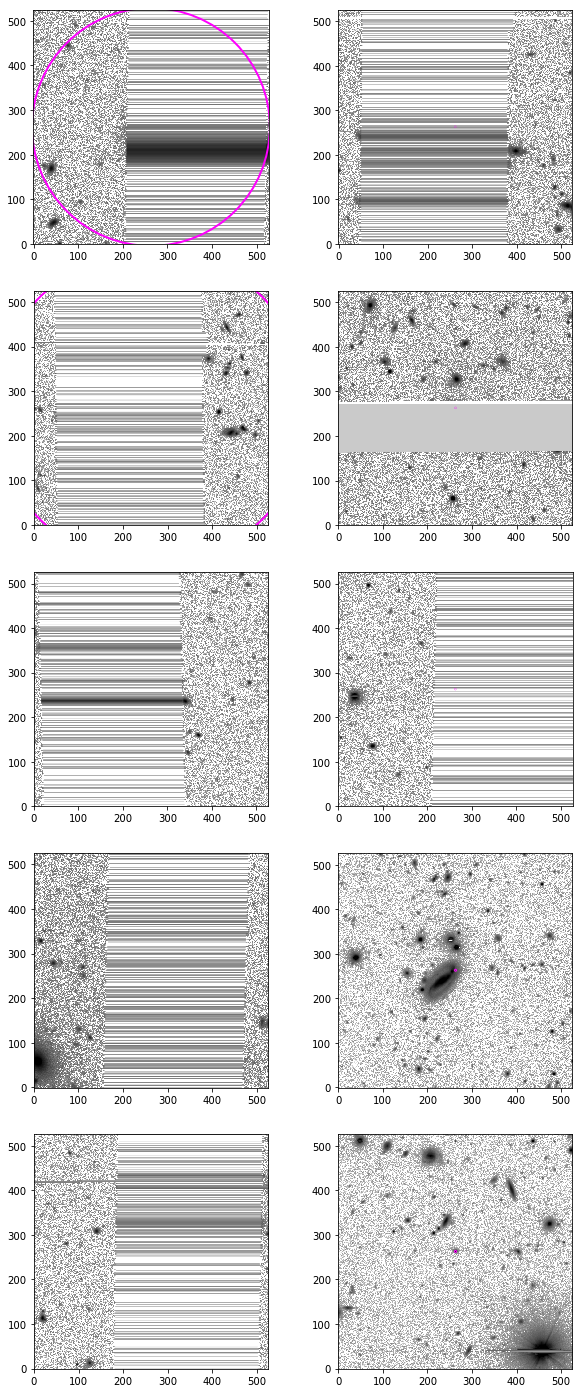

In [27]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
import os,sys
from glob import glob

# 0 object_id_stream_shell_cat,
# 1 spec_z,
# 2 fiber_RA,
# 3 fiber_Dec,
# 4 BC03_pca_mStar,
# 5 classID,
# 6 r_det_g,
# 7 r_det_r,
# 8 r_det_i,
# 9 r_det_z,
# 10 r_det_y,
# 11 Stream+Shell

catalogue = '/home/bottrell/scratch/Subaru/HyperSuprime/Catalogues/HSC-TF_all_2019-07-16_size_estimates.txt'
catData = np.loadtxt(catalogue,delimiter=',',dtype='str')
imgDir = '/home/bottrell/scratch/Subaru/HyperSuprime/Input/'
arcsec_per_pixel = 0.168

objIDs = catData[:,0].astype(int)
sizes = catData[:,8]
N_objs_nosize = len(sizes[sizes==''])
sizes[sizes==''] = '-999'
sizes = sizes.astype(float)
sizes[sizes==-999] = np.nan

# ignore nan objects
objIDs = objIDs[~np.isnan(sizes)]
sizes = sizes[~np.isnan(sizes)]


# remove objects for which there are no images
noImg = []
for i,objID in enumerate(objIDs):
    fileName = '{}{}_Cutout-525x525_i.fits'.format(imgDir,objID)
    if not os.access(fileName,0):
        noImg.append(i)
noImg = np.array(noImg)
bad = np.zeros(len(objIDs)).astype(bool)
bad[noImg] = True
objIDs = objIDs[~bad]
sizes = sizes[~bad]


# sort
sort = np.argsort(sizes)
objIDs = objIDs[sort]
sizes = sizes[sort]/arcsec_per_pixel

fig,axarr = plt.subplots(5,2,figsize=(10,25))

for ax,objID,size in zip(axarr.flat[0::2],objIDs[-5:],sizes[-5:]):
    
    fileName = '{}{}_Cutout-525x525_i.fits'.format(imgDir,objID)
    if not os.access(fileName,0): 
        print("No file named:{} was found.".format(fileName))
        continue
    fileName = '{}{}_Cutout-525x525_i.fits'.format(imgDir,objID)
    imgData = fits.getdata(fileName)
    ax.imshow(np.log10(imgData),vmin=-3,vmax=1,cmap='Greys',origin='lower')
    shape = imgData.shape
    hwx = int(shape[0]/2.)
    hwy = int(shape[1]/2.)
    circle = plt.Circle((hwy, hwx), size, color='magenta', fill=False, linewidth=2)
    ax.add_artist(circle)
    
for ax,objID,size in zip(axarr.flat[1::2],objIDs[:5],sizes[:5]):
    
    fileName = '{}{}_Cutout-525x525_i.fits'.format(imgDir,objID)
    if not os.access(fileName,0): 
        print("No file named:{} was found.".format(fileName))
        continue
    fileName = '{}{}_Cutout-525x525_i.fits'.format(imgDir,objID)
    imgData = fits.getdata(fileName)
    ax.imshow(np.log10(imgData),vmin=-3,vmax=1,cmap='Greys',origin='lower')
    shape = imgData.shape
    hwx = int(shape[0]/2.)
    hwy = int(shape[1]/2.)
    circle = plt.Circle((hwy, hwx), size, color='magenta', fill=False, linewidth=2)
    ax.add_artist(circle)
    
fig.savefig('/home/bottrell/projects/def-simardl/bottrell/Subaru/HyperSuprime/TidalCNN/min_max_Images.pdf')


/home/bottrell/venv/tf36-cpu/lib/python3.6/site-packages/ipykernel_launcher.py:66: RuntimeWarning: invalid value encountered in log10
/home/bottrell/venv/tf36-cpu/lib/python3.6/site-packages/ipykernel_launcher.py:81: RuntimeWarning: invalid value encountered in log10


3.8555788623307574
3.278153615843209
2.1854824041246945
3.4520828051500905
2.867656749085734


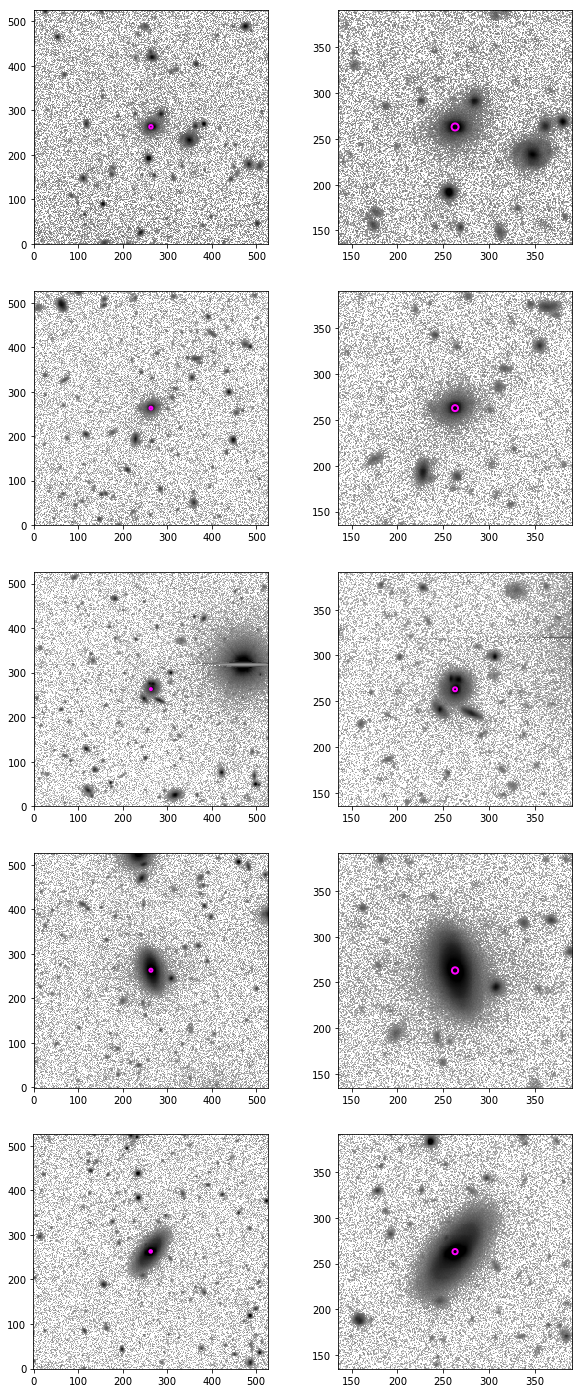

In [5]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
import os,sys
from glob import glob

# 0 object_id_stream_shell_cat,
# 1 spec_z,
# 2 fiber_RA,
# 3 fiber_Dec,
# 4 BC03_pca_mStar,
# 5 classID,
# 6 r_det_g,
# 7 r_det_r,
# 8 r_det_i,
# 9 r_det_z,
# 10 r_det_y,
# 11 Stream+Shell

catalogue = '/home/bottrell/scratch/Subaru/HyperSuprime/Catalogues/HSC-TF_all_2019-07-25.txt'
catData = np.loadtxt(catalogue,delimiter=',',dtype='str')
imgDir = '/home/bottrell/scratch/Subaru/HyperSuprime/Data/Images/'
arcsec_per_pixel = 0.168

objIDs = catData[:,0].astype(int)
sizes = catData[:,8]
N_objs_nosize = len(sizes[sizes==''])
sizes[sizes==''] = '-999'
sizes = sizes.astype(float)
sizes[sizes==-999] = np.nan

# ignore nan objects
objIDs = objIDs[~np.isnan(sizes)]
sizes = sizes[~np.isnan(sizes)]


# remove objects for which there are no images
noImg = []
for i,objID in enumerate(objIDs):
    fileName = '{}{}_Cutout-525x525_i.fits'.format(imgDir,objID)
    if not os.access(fileName,0):
        noImg.append(i)
noImg = np.array(noImg)
bad = np.zeros(len(objIDs)).astype(bool)
bad[noImg] = True
objIDs = objIDs[~bad]
sizes = sizes[~bad]


# sort
sort = np.argsort(sizes)
objIDs = objIDs[sort]
sizes = sizes[sort]/arcsec_per_pixel

fig,axarr = plt.subplots(5,2,figsize=(10,25))

indices = np.random.choice(range(len(objIDs)),10)
for ax,objID,size in zip(axarr.flat[0::2],objIDs[indices[:5]],sizes[indices[:5]]):
    
    fileName = '{}{}_Cutout-525x525_i.fits'.format(imgDir,objID)
    if not os.access(fileName,0): 
        print("No file named:{} was found.".format(fileName))
        continue
    fileName = '{}{}_Cutout-525x525_i.fits'.format(imgDir,objID)
    imgData = fits.getdata(fileName)
    ax.imshow(np.log10(imgData),vmin=-3,vmax=1,cmap='Greys',origin='lower')
    shape = imgData.shape
    hwx = int(shape[0]/2.)
    hwy = int(shape[1]/2.)
    circle = plt.Circle((hwy, hwx), radius=size, color='magenta', fill=False, linewidth=2)
    ax.add_artist(circle)
    
for ax,objID,size in zip(axarr.flat[1::2],objIDs[indices[:5]],sizes[indices[:5]]):
    
    fileName = '{}{}_Cutout-525x525_i.fits'.format(imgDir,objID)
    if not os.access(fileName,0): 
        print("No file named:{} was found.".format(fileName))
        continue
    fileName = '{}{}_Cutout-525x525_i.fits'.format(imgDir,objID)
    imgData = fits.getdata(fileName)
    ax.imshow(np.log10(imgData),vmin=-3,vmax=1,cmap='Greys',origin='lower')
    shape = imgData.shape
    hwx = int(shape[0]/2.)
    hwy = int(shape[1]/2.)
    print(size)
    circle = plt.Circle((hwy, hwx), radius=size, color='magenta', fill=False, linewidth=2)
    ax.add_artist(circle)
    ax.set_xlim(hwx-128,hwx+128)
    ax.set_ylim(hwy-128,hwy+128)

#fig.savefig('/home/bottrell/projects/def-simardl/bottrell/Subaru/HyperSuprime/TidalCNN/random_Images.pdf')

Min: 0.9601583394210228; Max: 1773.7247743820308; Median: 157.07275197136153


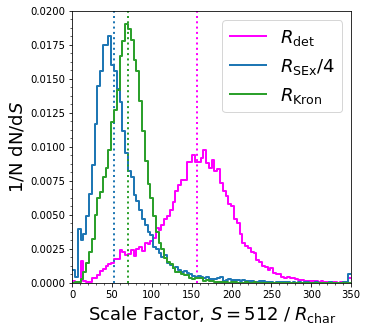

In [4]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
import os,sys
from glob import glob

# 0 object_id_stream_shell_cat,
# 1 spec_z,
# 2 fiber_RA,
# 3 fiber_Dec,
# 4 BC03_pca_mStar,
# 5 classID,
# 6 r_det_g,
# 7 r_det_r,
# 8 r_det_i,
# 9 r_det_z,
# 10 r_det_y,
# 11 Stream+Shell

catalogue = '/home/bottrell/scratch/Subaru/HyperSuprime/Catalogues/HSC-TF_all_2019-07-25.txt'
catData = np.loadtxt(catalogue,delimiter=',',dtype='str')
imgDir = '/home/bottrell/scratch/Subaru/HyperSuprime/Data/Images/'
arcsec_per_pixel = 0.168

objIDs = catData[:,0].astype(int)
sizes = catData[:,8]
N_objs_nosize = len(sizes[sizes==''])
sizes[sizes==''] = '-999'
sizes = sizes.astype(float)
sizes[sizes==-999] = np.nan

# ignore nan objects
objIDs = objIDs[~np.isnan(sizes)]
sizes = sizes[~np.isnan(sizes)]


# remove objects for which there are no images
noImg = []
for i,objID in enumerate(objIDs):
    fileName = '{}{}_Cutout-525x525_i.fits'.format(imgDir,objID)
    if not os.access(fileName,0):
        noImg.append(i)
noImg = np.array(noImg)
bad = np.zeros(len(objIDs)).astype(bool)
bad[noImg] = True
objIDs = objIDs[~bad]
sizes = sizes[~bad]

# sort
sort = np.argsort(sizes)
objIDs = objIDs[sort]
sizes = sizes[sort]/arcsec_per_pixel
scales = 512./sizes
print("Min: {}; Max: {}; Median: {}".format(np.min(scales),np.max(scales),np.median(scales)))

xmin,xmax = 0,350
fig,ax = plt.subplots(figsize=(5,5))
xedges = np.linspace(xmin,xmax,101)

scales = 512./sizes

binwidths = xedges[1:]-xedges[:-1]
H,xedges = np.histogram(np.clip(scales,a_min=xmin,a_max=xmax),xedges,density=False)
H = H/binwidths/np.sum(H)
H = np.insert(H,-1,H[-1])
ax.step(xedges,H,where='post',c='magenta',lw=2,label=r'$R_{\mathrm{det}}$')
ax.set_xlim(xmin,xmax)
ax.axvline(np.median(scales),color='magenta',linewidth=2,linestyle='dotted')


sizes = catData[:,14].astype(float)/arcsec_per_pixel/4
scales = 512./sizes

binwidths = xedges[1:]-xedges[:-1]
H,xedges = np.histogram(np.clip(scales,a_min=xmin,a_max=xmax),xedges,density=False)
H = H/binwidths/np.sum(H)
H = np.insert(H,-1,H[-1])
ax.step(xedges,H,where='post',c='C0',lw=2,label=r'$R_{\mathrm{SEx}}/4$')
ax.set_xlim(xmin,xmax)
ax.axvline(np.median(scales),color='C0',linewidth=2,linestyle='dotted')


catalogue = '/home/bottrell/scratch/Subaru/HyperSuprime/Catalogues/HSC-TF_all_2019-07-16_kron_det_sizes.txt'
catData = np.loadtxt(catalogue,delimiter=',',dtype='str')[1:]
sizes = catData[:,17]
sizes = sizes[sizes!=''].astype(float)/arcsec_per_pixel
scales = 512./sizes

binwidths = xedges[1:]-xedges[:-1]
H,xedges = np.histogram(np.clip(scales,a_min=xmin,a_max=xmax),xedges,density=False)
H = H/binwidths/np.sum(H)
H = np.insert(H,-1,H[-1])
ax.step(xedges,H,where='post',c='C2',lw=2,label=r'$R_{\mathrm{Kron}}$')
ax.set_xlim(xmin,xmax)
ax.axvline(np.median(scales),color='C2',linewidth=2,linestyle='dotted')


ax.set_xlabel(r'Scale Factor, $S = 512\; / \;R_{\mathrm{char}}$',size=18)
ax.set_ylabel(r'1/N dN/d$S$',size=18)
ax.minorticks_on()
ax.set_ylim(0)
ax.legend(fontsize=18)

In [85]:
import sep